In [45]:
import math
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def f(x):
    y = math.sqrt(1 - x**2)
    return y

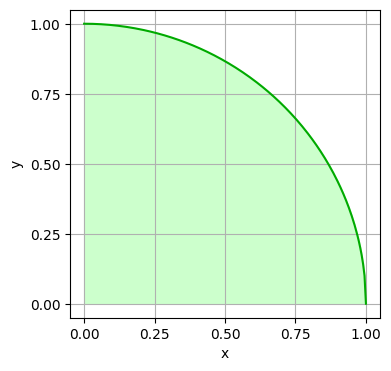

In [46]:
a = 0; b = 1; N = 200; M = 4

x = np.linspace(a, b, N, endpoint=True)
y = [f(i) for i in x]
rng = np.linspace(a, b, M+1, endpoint=True)

plt.figure(figsize=(4, 4))
plt.fill_between(x, y, y2=0, color='#cfc')
plt.plot(x, y, '-', color='#0a0')
plt.xticks(rng)
plt.yticks(rng)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

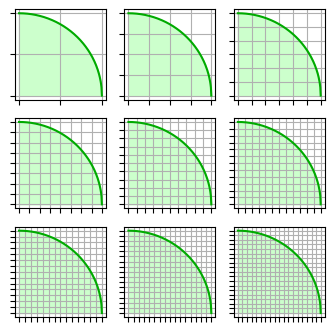

In [47]:
a = 0; b = 1; N = 200;
M = [2*i for i in range(1, 10)]
plt.figure(figsize=(4, 4))

for i, m in enumerate(M):
    x = np.linspace(a, b, N, endpoint=True)
    y = [f(j) for j in x]
    rng = np.linspace(a, b, m+1, endpoint=True)
    plt.subplot(3, 3, i+1)
    plt.fill_between(x, y, y2=0, color='#cfc')
    plt.plot(x, y, '-', color='#0a0')
    plt.xticks(rng, [])
    plt.yticks(rng, [])
    plt.grid()
plt.show()

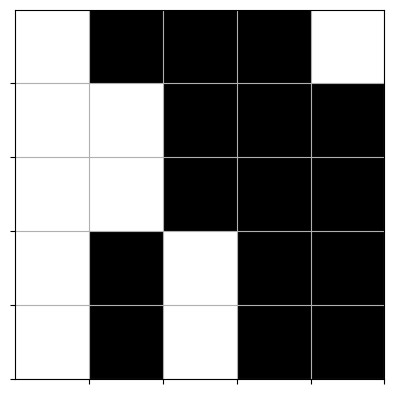

In [85]:
mat = [
    [1, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 1, 0, 0],
]

ROWS = len(mat)
COLS = len(mat[0])

yticks = np.linspace(0.5, ROWS-0.5, ROWS, True)
xticks = np.linspace(0.5, COLS-0.5, COLS, True)

plt.imshow(
    mat, 
    interpolation='nearest',
    cmap=cm.Greys_r
)
plt.xticks(xticks, labels=[])
plt.yticks(yticks, labels=[])
plt.grid()
plt.show()


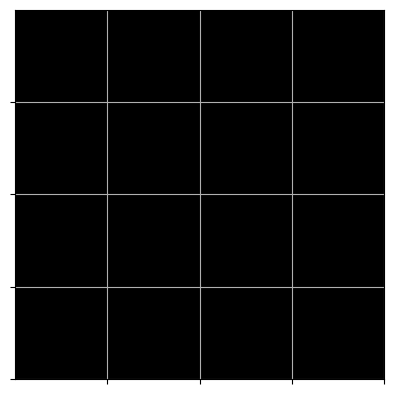

In [86]:
COLS = 4
ROWS = 4
mat = [[0] * COLS for i in range(ROWS)]

yticks = np.linspace(0.5, ROWS-0.5, ROWS, True)
xticks = np.linspace(0.5, COLS-0.5, COLS, True)

plt.imshow(
    mat, 
    interpolation='nearest',
    cmap=cm.Greys_r
)
plt.xticks(rng, labels=[])
plt.yticks(rng, labels=[])
plt.grid()
plt.show()

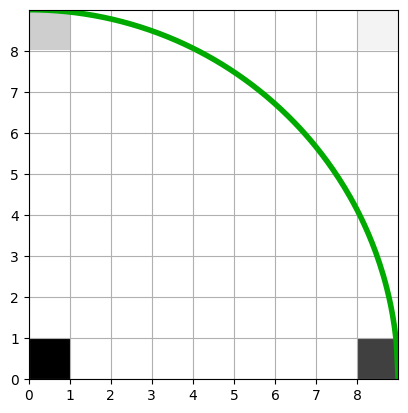

[[10, 0, 0, 0, 0, 0, 0, 0, 8], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 0, 0, 0, 1]]


In [219]:
M = 9
COLS = M; ROWS = M; R = M
mat = [[0] * COLS for i in range(ROWS)]
yticks = range(0, ROWS); xticks = range(0, COLS)

mat[0][0] = 10
mat[0][COLS-1] = 8
mat[ROWS-1][0] = 3
mat[ROWS-1][COLS-1] = 1

def g(x):
    y = math.sqrt(R**2 - x**2)
    return y
x = np.linspace(0, R, N, endpoint=True)
y = [g(i) for i in x]

plt.imshow(
    mat, interpolation='nearest',
    cmap=cm.Greys, origin='lower',
    extent = [0, COLS, 0, ROWS]
)
plt.xticks(xticks); plt.yticks(yticks)
plt.plot(x, y, '-', color='#0a0', lw=4)
plt.grid(); plt.show()

print(mat)

In [398]:
def g(x, R):
    y = math.sqrt(R**2 - x**2)
    return y

def generate(M):
    COLS = M; ROWS = M; R = M
    mat = [[0] * COLS for i in range(ROWS)]
    
    yticks = range(0, ROWS + 1);
    xticks = range(0, COLS + 1)
    
    Ncirc = 100
    x = np.linspace(0, R, Ncirc, endpoint=True)
    y = [g(i, R) for i in x]

    return mat, xticks, yticks, x, y

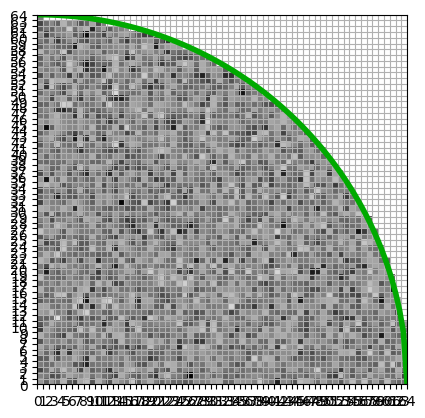

sampling      = 100000
grid          = 64x64
theory (pi/4) = 0.7853981633974483
monte carlo   = 0.78475


In [440]:
M = 64; N = 100000
COLS = M; ROWS = M; R = M
mat, xticks, yticks, x, y = generate(M)

for i in range(N):
    rx = rnd.randint(0, COLS-1)
    ry = rnd.randint(0, ROWS-1)
    if ry < int(g(rx, R)):
        mat[ry][rx] += 1

plt.imshow(
    mat, interpolation='nearest',
    cmap=cm.Greys, origin='lower',
    extent = [0, COLS, 0, ROWS]
)
plt.xticks(xticks); plt.yticks(yticks)
plt.plot(x, y, '-', color='#0a0', lw=4)
plt.grid(); plt.show()

print('sampling      =', N)
print('grid          = ', M, 'x', M, sep='')
print('theory (pi/4) =', math.pi / 4)
qpi = np.sum(mat) / N
print('monte carlo   =', qpi)

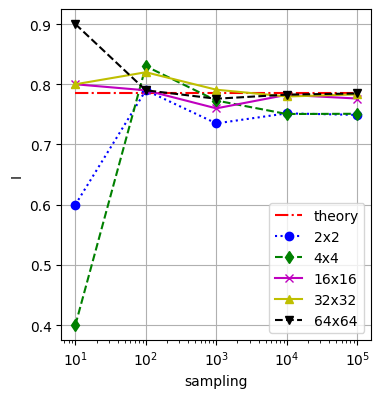

In [473]:
x = [10, 100, 1000, 10000, 100000]
y = [
    [math.pi/4]*5,
    [0.6, 0.79, 0.735, 0.7517, 0.7491],
    [0.4, 0.83, 0.773, 0.7506, 0.75101],
    [0.8, 0.79, 0.76, 0.7824, 0.7763],
    [0.8, 0.82, 0.791, 0.7797, 0.78315],
    [0.9, 0.79, 0.776, 0.7828, 0.78475],
]
legend = ['theory',
    '2x2', '4x4', '16x16', '32x32', '64x64']
plt.figure(figsize=(4, 4.3))
plt.plot(x, y[0], 'r-.', label=legend[0])
plt.plot(x, y[1], 'b:o', label=legend[1])
plt.plot(x, y[2], 'g--d', label=legend[2])
plt.plot(x, y[3], 'm-x', label=legend[3])
plt.plot(x, y[4], 'y-^', label=legend[4])
plt.plot(x, y[5], 'k--v', label=legend[5])
plt.xscale('log'); plt.xlabel('sampling');
plt.ylabel('I'); plt.grid(); plt.legend()
plt.show()